In [1]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import resource
import psutil

In [2]:
## Preprocessing of data
# Load data here:

data1 = pd.read_csv('CA1_1c_greenhouse_cleanedData_part1.csv')
data2 = pd.read_csv('CA1_1c_greenhouse_cleanedData_part2.csv')
data = pd.concat([data1,data2],ignore_index=True)

In [3]:
#data.describe()

In [4]:
## Find the number of 'nan' in each column:
#data.isnull().sum()

In [5]:
data.shape

(2921, 5232)

In [6]:
## Defien X and Y
X=data.iloc[:,0:5231]
Y=data.iloc[:,5231]

#x_mean=X.mean()
#x_std= X.std()
#X=(X-x_mean)/x_std

# Split train and test data here: (X_train, Y_train, X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(2336, 5231)

In [8]:
Y_train.shape

(2336,)

In [9]:
## Logistic ridge regression with different optimizers
# cost function
# N: number of samples, D: number of features

def cost(X, y, w, lambda_):
    N, D = X.shape
    value = 0
    for i in range(N):
        Z = -1 * y[i] * np.matmul(w.T , X[i,:].reshape(D,1))
        value += np.log(1+np.exp(Z))
    norm_w = np.linalg.norm(w)
    c = lambda_ * norm_w ** 2
    return value/N + c 

In [10]:
# cost function and gradient calculation
def grad(X, y, w, lambda_):
    # Calculate the gradient here
    N, D = X.shape
    gradient = np.zeros((D, 1))
    y = np.array(y).reshape(-1, 1) # convert y to numpy array and reshape
    for i in range(N):
        Z = y[i] * np.matmul(w.T , (X[i, :]).reshape(D, 1)) # use X[i, :] instead of X[:, i]
        exp_Z = np.exp(Z)
        gradient += (-y[i] / (1 + exp_Z)) * (X[i, :]).reshape(D, 1)
    c = 2 * lambda_ * w # add regularization term
    return gradient/N + c 

In [15]:
 # ---------------------- Complete the blank definitions: --------------------------------------
def solver(x,y, w, alpha, num_iters , lambda_ , epsilon , optimizer, mem):
    
    if (optimizer == "GD") :
        for i in range(num_iters):
            # update the parameter w for GD here:
            grad_w = grad(x, y, w, lambda_)
            w -= alpha * grad_w  
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for GD (MB):", (usage[2]*resource.getpagesize())/1000000.0)    
            if (np.linalg.norm(grad_w) <= epsilon):
                break
            
    elif (optimizer == "SGD"):
        N, D = x.shape
        batch = 1
        for i in range(num_iters):
            # Complete SGD here:
            zeta = np.random.randint(0, N, batch)
            grad_w = grad(x[zeta,:].reshape(batch, x.shape[1]) , y[zeta].reshape(batch,1), w, lambda_)
            w -= alpha * grad_w
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for SGD (MB):", (usage[2]*resource.getpagesize())/1000000.0)  
            if (np.linalg.norm(grad_w) <= epsilon):
                break
  
            
    elif (optimizer == "SVRG"):
        T = 10
        K = math.floor(num_iters/T)
        #Z = np.matmul(x,np.diagflat(y))
        N, D = x.shape
        w_tilde = w
        for k in range(K):
            #Compute all gradients and store
            grad_avg = grad(x, y, w, lambda_)
            for t in range(T):
            # Complete SVRG here:
                zeta = np.random.randint(N)
                x_t = x[zeta].reshape(-1, D) # Reshape X to be 2D
                y_t = y[zeta]
                grad_w_tilde = grad(x_t, y_t , w_tilde, lambda_)
                grad_w = grad(x_t, y_t, w, lambda_)
                w_tilde -= alpha * (grad_w_tilde - grad_w + grad_avg)
            w = w_tilde  
            #if (i%10==0) and (mem):
            #    usage=resource.getrusage(resource.RUSAGE_SELF)
            #    print("mem for SVRG (MB):", (usage[2]*resource.getpagesize())/1000000.0) 
            if (np.linalg.norm(grad_avg) <= epsilon):
                break

            
    elif (optimizer == "SAG"):
        N, D = x.shape
        grad_avg = grad(x, y, w, lambda_)
        grad_memory = np.matmul (np.ones((N,1)), grad_avg.T)
        for i in range(num_iters):
            # Compute average gradient
            zeta = np.random.randint(N)
            grad_zeta = grad(x[zeta, :].reshape(-1,D), y[zeta], w, lambda_)
            grad_memory[zeta, :] = grad_zeta.T
            grad_avg = np.mean(grad_memory, axis=0).reshape(D,1)
            w = w - alpha * grad_avg
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for SAG (MB):", (usage[2]*resource.getpagesize())/1000000.0)   
            if (np.linalg.norm(grad_avg) <= epsilon):
                break
    return w


In [19]:
## Define solvers: GD, SGD, SVRG and SAG. 
# Setting the values here:

alpha = 0.1 # change the value
num_iters = 50 #[1:5:30] # change the value
lambda_ = 0.1 #change the value
epsilon = 1e-6 #change the value


In [20]:
y = np.array(Y_train.iloc[0:2336])
x = np.array(X_train.iloc[0:2336,:])
N,D = x.shape
w_prime = np.random.rand(D,1)*0.01  # Initialization of w

...... 0 .......


/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_15949/4027734134.py:9: RuntimeWarning: overflow encountered in exp
  exp_Z = np.exp(Z)


...... 1 .......
...... 2 .......
...... 3 .......
...... 4 .......
...... 5 .......
...... 6 .......
...... 7 .......
...... 8 .......
...... 9 .......
...... 10 .......
...... 11 .......
...... 12 .......
...... 13 .......
...... 14 .......
...... 15 .......
...... 16 .......
...... 17 .......
...... 18 .......
...... 19 .......
...... 20 .......
...... 21 .......
...... 22 .......
...... 23 .......
...... 24 .......
...... 25 .......
...... 26 .......
...... 27 .......
...... 28 .......
...... 29 .......
...... 30 .......
...... 31 .......
...... 32 .......
...... 33 .......
...... 34 .......
...... 35 .......
...... 36 .......
...... 37 .......
...... 38 .......
...... 39 .......
...... 40 .......
...... 41 .......
...... 42 .......
...... 43 .......
...... 44 .......
...... 45 .......
...... 46 .......
...... 47 .......
...... 48 .......
...... 49 .......


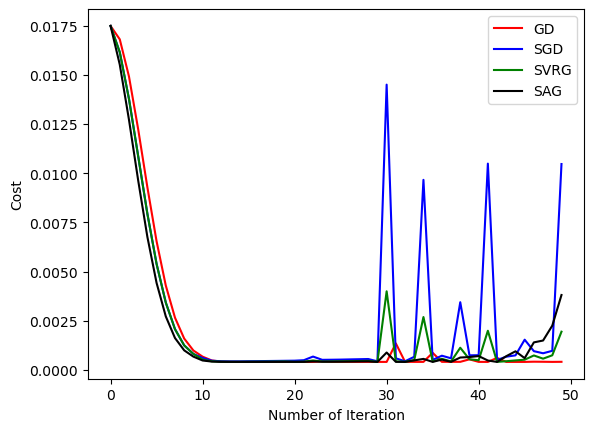

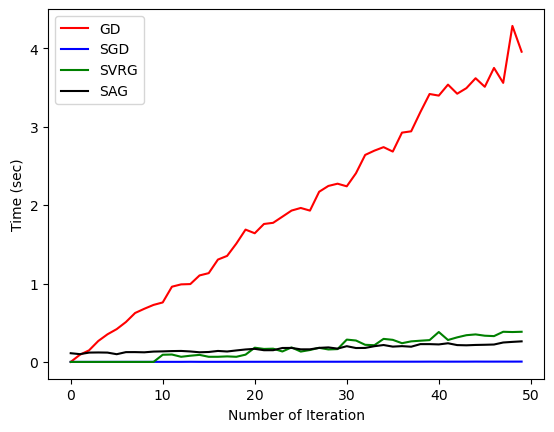

In [21]:
## Executing the iterations and plot the cost function here:
ti= np.zeros((num_iters,4))
cost_= np.zeros((num_iters,4))
for i in range(num_iters):
    print("......",i,".......")
    #--------------GD-------------------
    start = time.time()
    gde = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "GD", mem=False) 
    end = time.time()
    cost_[i,0] = cost(x,y,gde,lambda_)
    ti[i,0] = end-start

    #---------------SGD------------------
    #Complete for SGD solver here :
    start = time.time()
    sgde = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SGD", mem=False)
    end = time.time()

    cost_[i,1] = cost(x,y,sgde,lambda_)

    ti[i,1] = end-start
    
    #---------------SVRG----------------
    #Complete for SVRG solver here :
    start = time.time()
    svrge = solver(x,y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SVRG",mem=False)
    end = time.time()

    cost_[i,2] = cost(x,y,svrge,lambda_)

    ti[i,2] = end-start
    
    #---------------SAG------------------
   #Complete for SAG solver here :
    start = time.time()
    sage = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SAG",mem=False)
    
    end = time.time()

    cost_[i,3] = cost(x,y,sage,lambda_)

    ti[i,3] = end-start
    
    
## Pl the results:

l0 = plt.plot(cost_[:,0],color="red")
# complete other plots here: 
l1 = plt.plot(cost_[:,1],color="blue")
l2 = plt.plot(cost_[:,2],color="green")
l3 = plt.plot(cost_[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()



l0 = plt.plot(ti[:,0],color="red")
# complete other plots here:
l1 = plt.plot(ti[:,1],color="blue")
l2 = plt.plot(ti[:,2],color="green")
l3 = plt.plot(ti[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Time (sec)")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()
    
    
 

In [22]:
## PART 2: Tunning the hyper-paramter here:

# Define lambda and alpha ranges
lambda_set = [0.0001, 0.001, 0.01, 0.1, 1, 10]
alpha_set= [0.0001, 0.001, 0.01, 0.1]  


min_cost_gd = float('inf')
lambda_opt_gd = None
alpha_opt_gd = None

min_cost_sgd = float('inf')
lambda_opt_sgd = None
alpha_opt_sgd = None

min_cost_svrg = float('inf')
lambda_opt_svrg = None
alpha_opt_svrg = None

min_cost_sag = float('inf')
lambda_opt_sag = None
alpha_opt_sag = None

for lambda_ in lambda_set:
    for alpha in alpha_set:
        gde = solver(x, y, w_prime,alpha, num_iters, lambda_,epsilon, "GD",mem=False) # complete the command 
        cost_gd = cost(x, y, gde, lambda_=lambda_)
        if cost_gd < min_cost_gd:
            min_cost_gd = cost_gd
            lambda_opt_gd = lambda_
            alpha_opt_gd = alpha
        
        sgde = solver(x, y, w_prime,alpha, num_iters, lambda_,epsilon, "SGD",mem=False) # complete the command 
        cost_sgd = cost(x, y, sgde, lambda_=lambda_)
        if cost_sgd < min_cost_sgd:
            min_cost_sgd = cost_sgd
            lambda_opt_sgd = lambda_
            alpha_opt_sgd = alpha
        
        svrge = solver(x, y, w_prime,alpha, num_iters, lambda_,epsilon, "SVRG",mem=False) # complete the command 
        cost_svrg = cost(x, y, svrge, lambda_=lambda_)
        if cost_svrg < min_cost_svrg:
            min_cost_svrg = cost_svrg
            lambda_opt_svrge = lambda_
            alpha_opt_svrge = alpha
            
        sage = solver(x, y, w_prime,alpha, num_iters, lambda_,epsilon, "SAG",mem=False) # complete the command 
        cost_sag = cost(x, y, sage, lambda_=lambda_)
        if cost_sag < min_cost_sag:
            min_cost_sag = cost_sag
            lambda_opt_sage = lambda_
            alpha_opt_sage = alpha
        
        
print("The optimal lambda for GD:", lambda_opt_gd)
print("Optimal alpha for GD:", alpha_opt_gd)

print("The optimal lambda for SGD:", lambda_opt_sgd)
print("Optimal alpha for SGD:", alpha_opt_sgd)

print("The optimal lambda for SVRG:", lambda_opt_svrg)
print("Optimal alpha for SVRG:", alpha_opt_svrg)

print("The optimal lambda for SAG:", lambda_opt_sag)
print("Optimal alpha for SAG:", alpha_opt_sag)



/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_15949/4027734134.py:9: RuntimeWarning: overflow encountered in exp
  exp_Z = np.exp(Z)
/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_15949/2465893598.py:10: RuntimeWarning: overflow encountered in exp
  value += np.log(1+np.exp(Z))


The optimal lambda for GD: 0.0001
Optimal alpha for GD: 0.1
The optimal lambda for SGD: 0.0001
Optimal alpha for SGD: 0.1
The optimal lambda for SVRG: None
Optimal alpha for SVRG: None
The optimal lambda for SAG: None
Optimal alpha for SAG: None


...... 0 .......


/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_15949/4027734134.py:9: RuntimeWarning: overflow encountered in exp
  exp_Z = np.exp(Z)


...... 1 .......
...... 2 .......
...... 3 .......
...... 4 .......
...... 5 .......
...... 6 .......
...... 7 .......
...... 8 .......
...... 9 .......
...... 10 .......
...... 11 .......
...... 12 .......
...... 13 .......
...... 14 .......
...... 15 .......
...... 16 .......
...... 17 .......
...... 18 .......
...... 19 .......
...... 20 .......
...... 21 .......
...... 22 .......
...... 23 .......
...... 24 .......
...... 25 .......
...... 26 .......
...... 27 .......
...... 28 .......
...... 29 .......
...... 30 .......
...... 31 .......
...... 32 .......
...... 33 .......
...... 34 .......
...... 35 .......
...... 36 .......
...... 37 .......
...... 38 .......
...... 39 .......
...... 40 .......
...... 41 .......
...... 42 .......
...... 43 .......
...... 44 .......
...... 45 .......
...... 46 .......
...... 47 .......
...... 48 .......
...... 49 .......


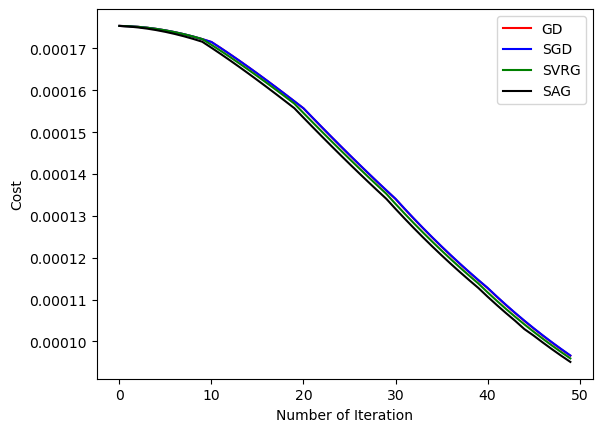

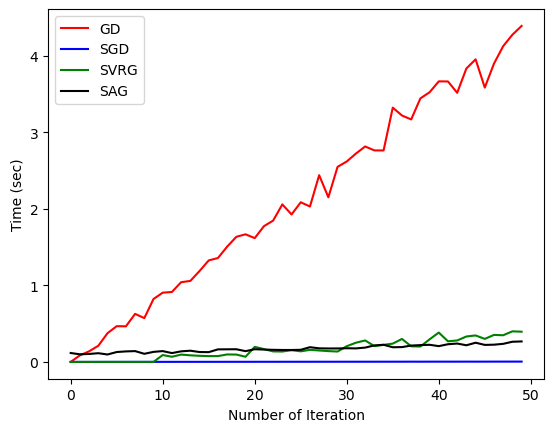

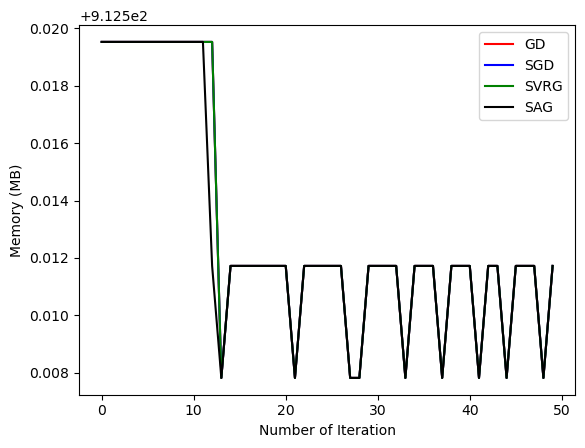

In [23]:
## Comparing different optimizers here: 
y = np.array(Y_train.iloc[0:2336])
x = np.array(X_train.iloc[0:2336,:])
N,D = x.shape
w_prime = np.random.rand(D,1)*0.01  # Initialization of w
# initialize hyperparameters
alpha = 0.1
lambda_ = 0.0001
epsilon = 1e-6

# initialize results arrays
ti = np.zeros((50,4))
cost_ = np.zeros((50,4))
mem = np.zeros((50,4))

for i in range(50):
    print("......",i,".......")
    #--------------GD-------------------
    start = time.time()
    gde = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="GD", mem=False) 
    end = time.time()
    cost_[i,0] = cost(x,y,gde,lambda_)
    ti[i,0] = end-start
    process = psutil.Process()
    mem[i,0] = process.memory_info().rss / 1024 / 1024 # memory usage in MB
    
    #---------------SGD------------------
    #Complete for SGD solver here :
    start = time.time()
    sgde = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="SGD", mem=False)
    end = time.time()
    cost_[i,1] = cost(x,y,sgde,lambda_)
    ti[i,1] = end-start
    process = psutil.Process()
    mem[i,1] = process.memory_info().rss / 1024 / 1024
    
    #---------------SVRG----------------
    #Complete for SVRG solver here :
    start = time.time()
    svrge = solver(x,y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SVRG",mem=False)
    end = time.time()
    cost_[i,2] = cost(x,y,svrge,lambda_)
    ti[i,2] = end-start
    process = psutil.Process()
    mem[i,2] = process.memory_info().rss / 1024 / 1024
    
    
    #---------------SAG------------------
    #Complete for SAG solver here :
    start = time.time()
    sage = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SAG",mem=False)
    end = time.time()
    cost_[i,3] = cost(x,y,sage,lambda_)
    ti[i,3] = end-start
    process = psutil.Process()
    mem[i,3] = process.memory_info().rss / 1024 / 1024
    
    
## Pl the results:
l0 = plt.plot(cost_[:,0],color="red")
# complete other plots here: 
l1 = plt.plot(cost_[:,1],color="blue")
l2 = plt.plot(cost_[:,2],color="green")
l3 = plt.plot(cost_[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()



l0 = plt.plot(ti[:,0],color="red")
# complete other plots here:
l1 = plt.plot(ti[:,1],color="blue")
l2 = plt.plot(ti[:,2],color="green")
l3 = plt.plot(ti[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Time (sec)")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()

l0 = plt.plot(mem[:,0],color="red")
# complete other plots here:
l1 = plt.plot(mem[:,1],color="blue")
l2 = plt.plot(mem[:,2],color="green")
l3 = plt.plot(mem[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Memory (MB)")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()

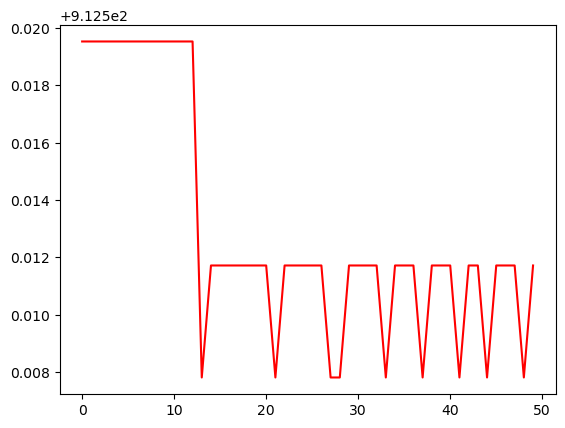

In [24]:
l0 = plt.plot(mem[:,0],color="red")
plt.show()

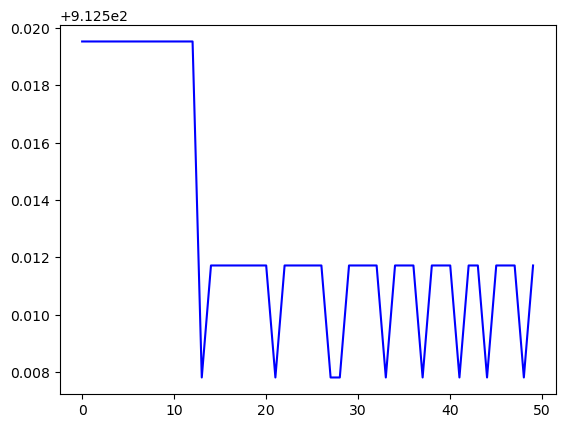

In [25]:
l1 = plt.plot(mem[:,1],color="blue")
plt.show()


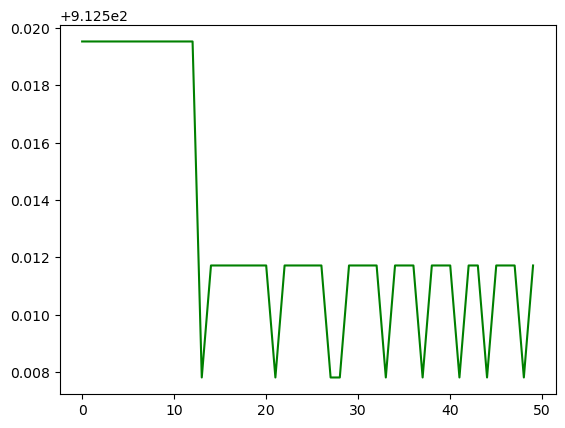

In [26]:
l2 = plt.plot(mem[:,2],color="green")
plt.show()


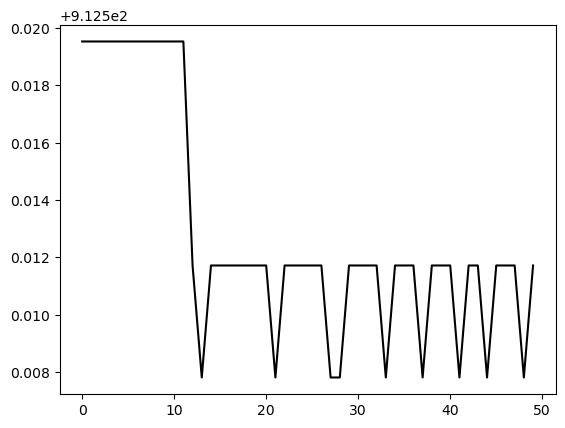

In [27]:
l3 = plt.plot(mem[:,3],color="black")
plt.show()


In [28]:
gde = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="GD", mem=True)    
sgde = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="SGD", mem=True)
svrge = solver(x,y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SVRG",mem=True)
sage = solver(x, y, w_prime, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SAG",mem=True)
   

/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_15949/4027734134.py:9: RuntimeWarning: overflow encountered in exp
  exp_Z = np.exp(Z)


mem for GD (MB): 3929190.432768
mem for GD (MB): 3929190.432768
mem for GD (MB): 3929190.432768
mem for GD (MB): 3929190.432768
mem for GD (MB): 3929190.432768
mem for SGD (MB): 3929190.432768
mem for SGD (MB): 3929190.432768
mem for SGD (MB): 3929190.432768
mem for SGD (MB): 3929190.432768
mem for SGD (MB): 3929190.432768
mem for SAG (MB): 3929190.432768
mem for SAG (MB): 3929190.432768
mem for SAG (MB): 3929190.432768
mem for SAG (MB): 3929190.432768
mem for SAG (MB): 3929190.432768
